In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
d=pd.read_csv('fertility.csv')
d.shape

(99, 10)

In [2]:
d.columns=['season','age','childish disease','accident','surgeries','high fever','alcohol','smoke','hours spent sitting','output']

In [3]:
d

,season,age,childish disease,accident,surgeries,high fever,alcohol,smoke,hours spent sitting,output
0,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
1,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
2,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
3,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
4,-0.33,0.67,1,0,1,0,0.8,0,0.50,N
...,...,...,...,...,...,...,...,...,...,...
94,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
95,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
96,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
97,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [4]:
dfs=pd.DataFrame(data=d)
dfs

,season,age,childish disease,accident,surgeries,high fever,alcohol,smoke,hours spent sitting,output
0,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
1,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
2,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
3,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
4,-0.33,0.67,1,0,1,0,0.8,0,0.50,N
...,...,...,...,...,...,...,...,...,...,...
94,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
95,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
96,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
97,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [5]:
dfs.dtypes

season                 float64
age                    float64
childish disease         int64
accident                 int64
surgeries                int64
high fever               int64
alcohol                float64
smoke                    int64
hours spent sitting    float64
output                  object
dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfs['output']=le.fit_transform(dfs['output'])
dfs['output']


0     1
1     0
2     0
3     1
4     0
     ..
94    0
95    0
96    0
97    0
98    0
Name: output, Length: 99, dtype: int32

In [7]:
dfs.isnull().sum()

season                 0
age                    0
childish disease       0
accident               0
surgeries              0
high fever             0
alcohol                0
smoke                  0
hours spent sitting    0
output                 0
dtype: int64

In [8]:
dfcor=dfs.corr()
dfcor

,season,age,childish disease,accident,surgeries,high fever,alcohol,smoke,hours spent sitting,output
season,1.000000,0.066010,-0.191464,-0.093313,-0.003091,-0.223105,-0.041934,-0.026732,-0.011239,0.191464
age,0.066010,1.000000,0.088141,0.215397,0.271585,0.120947,-0.247687,0.071897,-0.462468,0.115976
childish disease,-0.191464,0.088141,1.000000,0.200562,-0.120052,0.069479,0.034721,0.105631,-0.086882,-0.051724
accident,-0.093313,0.215397,0.200562,1.000000,0.093046,-0.079084,-0.242140,0.105985,-0.016613,-0.138123
surgeries,-0.003091,0.271585,-0.120052,0.093046,1.000000,-0.229584,-0.074332,-0.058093,-0.226632,0.058150
high fever,-0.223105,0.120947,0.069479,-0.079084,-0.229584,1.000000,-0.001469,-0.006092,-0.147632,-0.122799
alcohol,-0.041934,-0.247687,0.034721,-0.242140,-0.074332,-0.001469,1.000000,-0.184292,0.120366,-0.145604
smoke,-0.026732,0.071897,0.105631,0.105985,-0.058093,-0.006092,-0.184292,1.000000,-0.121388,0.047592
hours spent sitting,-0.011239,-0.462468,-0.086882,-0.016613,-0.226632,-0.147632,0.120366,-0.121388,1.000000,0.033628
output,0.191464,0.115976,-0.051724,-0.138123,0.058150,-0.122799,-0.145604,0.047592,0.033628,1.000000


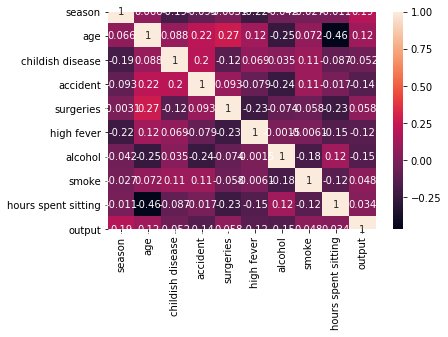

In [9]:
sns.heatmap(dfcor,annot=True)

In [10]:
dfs.skew()

season                 0.330605
age                    0.669188
childish disease      -2.357056
accident               0.269013
surgeries             -0.020515
high fever            -0.047384
alcohol               -0.839862
smoke                  0.737400
hours spent sitting    0.749755
output                 2.357056
dtype: float64

In [11]:
dfs.describe()

,season,age,childish disease,accident,surgeries,high fever,alcohol,smoke,hours spent sitting,output
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,-0.076364,0.668788,0.878788,0.434343,0.505051,0.191919,0.832323,-0.353535,0.402020,0.121212
std,0.800374,0.121917,0.328035,0.498193,0.502519,0.583389,0.168322,0.812066,0.181079,0.328035
min,-1.000000,0.500000,0.000000,0.000000,0.000000,-1.000000,0.200000,-1.000000,0.060000,0.000000
25%,-1.000000,0.560000,1.000000,0.000000,0.000000,0.000000,0.800000,-1.000000,0.250000,0.000000
50%,-0.330000,0.670000,1.000000,0.000000,1.000000,0.000000,0.800000,-1.000000,0.380000,0.000000
75%,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.500000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [57]:
x=dfs.drop(columns=['output'])
y=dfs[['output']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [58]:
model=[LogisticRegression(),SVC(),DecisionTreeClassifier(criterion='gini'),RandomForestClassifier()]

In [59]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of', m,'is',accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm)) 
    print('\n')
    
    

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is 0.8
[[16  0]
 [ 4  0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       0.00      0.00      0.00         4

    accuracy                           0.80        20
   macro avg       0.40      0.50      0.44        20
weighted avg       0.64      0.80      0.71        20



Accuracy score of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) is 0.8
[[16  0]
 [ 4  0]]
              pr

In [60]:
from sklearn.model_selection import GridSearchCV
knc=KNeighborsClassifier()
parameters={'n_neighbors':range(1,30)}
clf=GridSearchCV(knc,parameters,cv=10)
clf.fit(x_train,y_train)
clf.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 2}

In [61]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.9367088607594937

In [62]:
from sklearn.model_selection import cross_val_score
cknn=cross_val_score(knn,x,y,cv=10)
print('Mean cross_val_score',cknn.mean())
print('STD cross_val_score',cknn.std())


Mean cross_val_score 0.8803030303030303
STD cross_val_score 0.031431026025255764


In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.9367088607594937

In [64]:
from sklearn.externals import joblib
joblib.dump(knn,'Project_14_fertility.pkl')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Project_14_fertility.pkl']